<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/Sound_of_Waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Sound of Multiple Waves</h1></b>

Dr. Bingsen Wang

12/1/2023
</center>

#Python Code
The Python code generates the sound of varies waveforms.  

Moviepy - Building video SoundOfWavesFinal.mp4.
MoviePy - Writing audio in SoundOfWavesFinalTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video SoundOfWavesFinal.mp4



Moviepy - Done !
Moviepy - video ready SoundOfWavesFinal.mp4


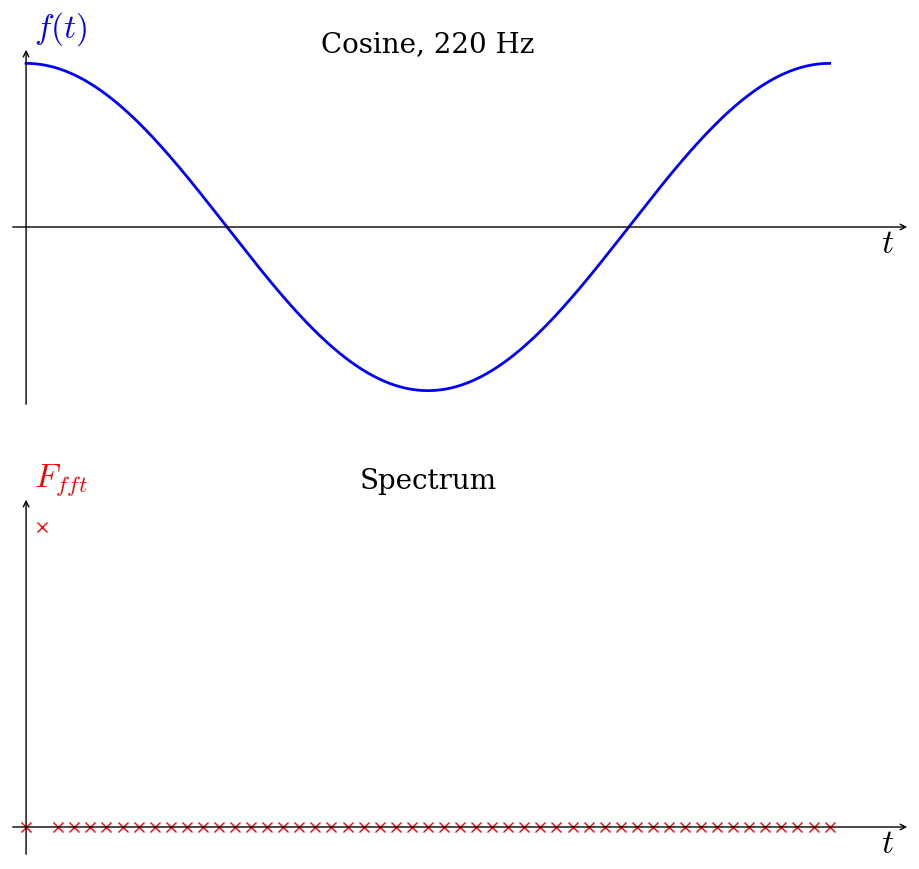

In [34]:
from logging import WARNING
from os import linesep
import matplotlib
from scipy.io.wavfile import write
from moviepy.editor import *
from numpy import linspace,cos,pi,sin,arccos,fft,angle,abs,clip,heaviside,tan,arctan,int16,array
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

# functions
def spectrum(xt): #spectrum - magnitude and angle
  xfft = fft.rfft(xt)
  xfft_angle = angle(xfft)
  xfft_mag = abs(xfft)/len(xt)*2
  xfft_mag[0]=xfft_mag[0]*0.5 #adjust the dc component
  return xfft_mag,xfft_angle

def waveforms(f,n,t): #n: type of the waveform
  if n==0:
    y = cos(2*pi*f*t)
    return y,'Cosine'
  elif n==1:
    y = (heaviside(cos(2*pi*f*t),0)*2-1)*(heaviside(abs(cos(2*pi*f*t))-0.2,0))
    return y,'Square'
  elif n==2:
    y = 2/pi*arctan(tan(pi*f*t))
    return y,'Sawtooth Rising'
  elif n==3:
    y = -2/pi*arctan(tan(pi*f*t))
    return y, 'Sawtooth Falling'
  elif n==4:
    y = 2/pi*arccos(cos(2*pi*f*t+pi))-1
    return y,'Triangle'
  elif n==5:
    y = clip((2/pi*arccos(cos(2*pi*f*t+pi))-1)*2,-1,1)
    return y,'Trapezoid'
  else:
    y = abs(sin(pi*f*t))-2/pi
    return y,'Rectified Sine'

# parameters
Nf = 7 # number of frames
f1 = [1, 2, 4] #fundamental frequency for plotting
fsnd = [220, 440, 880] #fundamental frequency for sound
sr = 44100 #sampling rate
tpf = 1.0 # time per frame

#time and frequency series
t = linspace(0,1,2048) #time series for plotting
tsnd=linspace(0,tpf,int(tpf*sr)) #time series for sampling
fser = linspace(0,1,51) # frequency series
soundTrack=[]
for i in range(len(fsnd)):
  for k in range(Nf):
    soundTrack.extend(int16(waveforms(fsnd[i],k,tsnd)[0]*32767))

fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax_frame = [[[0, 0.5, 1, .4], [-.02,1.1], [-1.1,1.1]], #time-domain waveform
            [[0, 0,   1, .4], [-.02,1.1], [-.1,1.1]], # spectrum
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['$f(t)$', '$t$'],
        ['$F_{fft}$', '$t$'],
        ] #variables for yx axes of each subplot
title_lst = ['','Spectrum']
clst=['b','r'] #colors of lines
tx_titles = []
ax_lst=[] #axis list or the list of subplots
ylabel_lst=[] #y-labels to update
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  if k==0:
    line_wave = ax.plot([], [],color=clst[k], lw=2)[0]
  else:
    line_fft = ax.plot([], [], ls='',color=clst[k],marker='x',markersize=7)[0] #fft plot
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  ylabel_lst.append(ax.text(0.01,ym,ax_lbl[k][0],size=24,va='bottom',color=clst[k])) #y label
  tx_titles.append(ax.text(0.5,ax_frame[k][2][1]+0.1,title_lst[k],va='top',ha='center',size=20))

# animation function. This is called sequentially
def animate(i):
  k = int(i/Nf)
  ii = i%Nf
  ft,wn = waveforms(f1[k],ii,t)
  Ffft = spectrum(ft)
  line_wave.set_data(t,ft)
  line_fft.set_data(fser,Ffft[0][0:len(fser)])
  tx_titles[0].set_text(wn+', '+str(fsnd[k])+' Hz')
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf*len(fsnd), interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "SoundOfWaves"
writervideo = animation.FFMpegWriter(fps=1)
anim.save(fn+'.mp4', writer=writervideo,dpi = 120)
write(fn+'.wav', sr,array(soundTrack))
audio = AudioFileClip(fn+'.wav',fps=sr)
video = VideoFileClip(fn+'.mp4')
final = video.set_audio(audio)
# final.ipython_display()
final.write_videofile(fn+"Final.mp4")